In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [4]:
import os

def keep_first_100_images(subfolder_path):
    # List all files in the subfolder
    all_images = os.listdir(subfolder_path)

    # Filter out only image files (you may need to adjust the extensions)
    image_files = [f for f in all_images if f.endswith(('.jpg', '.jpeg', '.png'))]

    # Sort image files alphabetically
    image_files.sort()

    # Keep only the first 100 images
    images_to_keep = image_files[:100]

    # Delete images not in the first 100
    for image in image_files:
        if image not in images_to_keep:
            os.remove(os.path.join(subfolder_path, image))

# Example usage
subfolder_path = "C:/Users/sujal/Desktop/LeaveDisease/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Potato___healthy"
keep_first_100_images(subfolder_path)

In [3]:
len(os.listdir("New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"))

38

In [4]:
train_datagen = ImageDataGenerator(zoom_range=0.5, shear_range=0.3, horizontal_flip=True,preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


In [5]:
train = train_datagen.flow_from_directory(directory="New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",
                                          target_size=(224,224),
                                          batch_size=32)
val = val_datagen.flow_from_directory(directory="New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",
                                      target_size=(224,224),
                                      batch_size=32)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [6]:
t_img, label=train.next()
#t_img.shape

In [7]:
def plotImage(img_arr, label):
    for im, l in zip(img_arr, label):
        plt.figure(figsize=(5,5))
        plt.imshow(im)
        plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


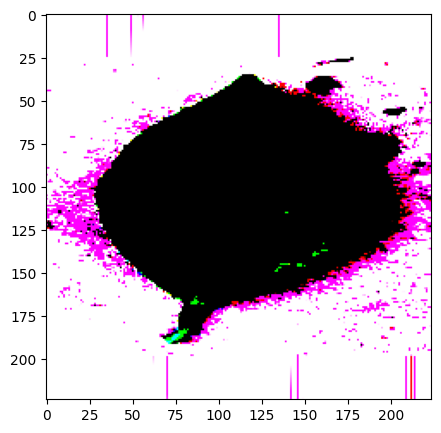

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


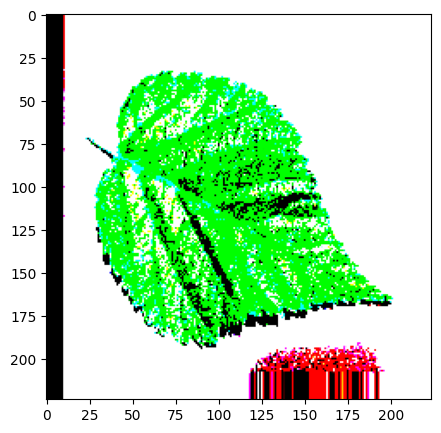

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


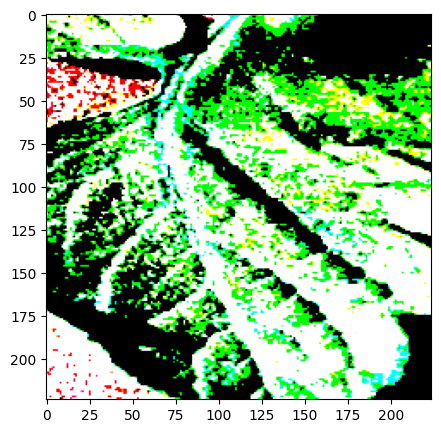

In [8]:
plotImage(t_img[:3], label[:3])

In [9]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [10]:
base_model = VGG19(input_shape=(224,224,3), include_top=False)




80134624/80134624 [==============================] - 27s 0us/step


In [11]:
for layer in base_model.layers:
    layer.trainable = False

In [12]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [13]:
X = Flatten()(base_model.output)

X = Dense(units = 38, activation='softmax')(X)

#Creating our model
model = Model(base_model.input, X)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [15]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

#early stopping
#es = EarlyStopping(monitor='val_accuracy', min_delta = 0.01, patience = 3, verbose =1)

#model check point
mc = ModelCheckpoint(filepath="best_model.h5",
                     monitor='val_accuracy',
                     min_delta = 0.01,
                     patience=3,
                     verbose=1,
                     save_best_only=True)

#cb = [es,mc]

In [ ]:
his = model.fit_generator(train, 
                          steps_per_epoch=16, 
                          epochs=50, 
                          verbose = 1, 
                          callbacks = mc,
                          validation_data=val,
                          validation_steps= 16)

In [ ]:
model.save('best_model.h5')

In [3]:
h = his.history
h.keys()

In [4]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = "red")
plt.title("acc vs v-acc")
plt.show()


In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")
plt.title("loss vs v-loss")
plt.show()

In [24]:
#load best model
import keras
from keras.models import load_model
from keras.preprocessing.image import img_to_array, load_img
from keras.applications.vgg19 import preprocess_input
import numpy as np

model = load_model("best_model.h5")

In [25]:
# acc = model.evaluate_generator(val)[1]
# print(f"The accuracy of your model is {acc*100} %")

In [26]:
# ref = dict(zip(list(train.class_indices.values()), list(train.class_indices.keys())))

In [27]:
def prediction(path):
    img = load_img(path, target_size=(224,224))
    i = img_to_array(img)
    im = preprocess_input(i)
    img = np.expand_dims(im, axis=0)
    pred = np.argmax(model.predict(img))
    print(pred)

In [28]:
path = "0012e1ee-fde3-478f-ab27-18648feb2b05___FAM_L.Blight 1647.jpeg"

prediction(path)

ValueError: Input 0 of layer "model" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(1, 256, 256, 3)